In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, QuantileTransformer, MaxAbsScaler
from sklearn.metrics import r2_score, mean_absolute_error

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

In [3]:
import Grey_Wolves as GWO

In [4]:
url_file = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat'
columns = ['frequency',
           'angle_of_attack', 
           'chord_length', 
           'free_stream_velocity',
           'suction_side_displacement_thickness',
           'scaled_sound_pressure_level']

features = ['frequency','angle_of_attack', 
            'chord_length', 
            'free_stream_velocity',
            'suction_side_displacement_thickness']

df = pd.read_csv(url_file, sep='\t', header=None, names=columns)

In [5]:
df.head()

,frequency,angle_of_attack,chord_length,free_stream_velocity,suction_side_displacement_thickness,scaled_sound_pressure_level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [6]:
df.tail()

,frequency,angle_of_attack,chord_length,free_stream_velocity,suction_side_displacement_thickness,scaled_sound_pressure_level
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224
1502,6300,15.6,0.1016,39.6,0.052849,104.204


In [7]:
df.describe()

,frequency,angle_of_attack,chord_length,free_stream_velocity,suction_side_displacement_thickness,scaled_sound_pressure_level
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   frequency                            1503 non-null   int64  
 1   angle_of_attack                      1503 non-null   float64
 2   chord_length                         1503 non-null   float64
 3   free_stream_velocity                 1503 non-null   float64
 4   suction_side_displacement_thickness  1503 non-null   float64
 5   scaled_sound_pressure_level          1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [9]:
def preprocess_input(df):
    
    train_data = df.copy()
    train_set = train_data.drop("scaled_sound_pressure_level", axis = 1)
    train_labels = train_data["scaled_sound_pressure_level"].copy()
    
    train_set = QuantileTransformer(random_state=0).fit_transform(train_set)
    train_set = MaxAbsScaler().fit_transform(train_set)
    train_set = StandardScaler().fit_transform(train_set)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(train_set, train_labels, test_size=0.2)
    
    return X_train, X_test, y_train, y_test

In [10]:
X_train, X_test, y_train, y_test = preprocess_input(df)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1202, 5)
(301, 5)
(1202,)
(301,)


In [12]:
model = Sequential()

model.add(Input(X_train.shape[1],))

model.add(Dense(48, activation = 'relu'))

model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 48)                288       
                                                                 
 dense_1 (Dense)             (None, 1)                 49        
                                                                 
Total params: 337 (1.32 KB)
Trainable params: 337 (1.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.compile(loss = 'mean_squared_error', metrics = tf.keras.metrics.RootMeanSquaredError())

In [14]:
def get_shape(model):
    weights_layer = model.get_weights()
    shapes = []
    for weights in weights_layer:
        shapes.append(weights.shape)
    return shapes

In [15]:
def set_shape(weights,shapes):
    new_weights = []
    index=0
    for shape in shapes:
        if(len(shape)>1):
            n_nodes = np.prod(shape) + index
        else:
            n_nodes=shape[0]+index
        tmp = np.array(weights[index:n_nodes]).reshape(shape)
        new_weights.append(tmp)
        index=n_nodes
    return new_weights

In [16]:
shape = get_shape(model)
num_solutions = 20
num_dimensions = 337

In [17]:
def evaluate_nn(W):
    model.set_weights(set_shape(W,shape))
    score = model.evaluate(X_train, y_train, verbose = 0)
    return score[1]

In [18]:
from math import gamma
from typing import List, Union, Tuple, Dict

def get_levy_flight_step(beta: float = 1.0, multiplier: float = 0.001, 
                             size: Union[List, Tuple, np.ndarray] = None, case: int = 0) -> Union[float, List, np.ndarray]:
        """
        Get the Levy-flight step size

        Args:
            beta (float): Should be in range [0, 2].

                * 0-1: small range --> exploit
                * 1-2: large range --> explore

            multiplier (float): default = 0.001
            size (tuple, list): size of levy-flight steps, for example: (3, 2), 5, (4, )
            case (int): Should be one of these value [0, 1, -1].

                * 0: return multiplier * s * self.generator.uniform()
                * 1: return multiplier * s * self.generator.normal(0, 1)
                * -1: return multiplier * s

        Returns:
            float, list, np.ndarray: The step size of Levy-flight trajectory
        """
        # u and v are two random variables which follow self.generator.normal distribution
        # sigma_u : standard deviation of u
        sigma_u = np.power(gamma(1. + beta) * np.sin(np.pi * beta / 2) / (gamma((1 + beta) / 2.) * beta * np.power(2., (beta - 1) / 2)), 1. / beta)
        # sigma_v : standard deviation of v
        sigma_v = 1
        size = 1 if size is None else size
        u = np.random.normal(0, sigma_u ** 2, size)
        v = np.random.normal(0, sigma_v ** 2, size)
        s = u / np.power(np.abs(v), 1 / beta)
        if case == 0:
            step = multiplier * s * np.random.uniform()
        elif case == 1:
            step = multiplier * s * np.random.normal(0, 1)
        else:
            step = multiplier * s
        return step[0] if size == 1 else step

In [19]:
def sech(x):
    return 1 / np.cosh(x)

In [20]:
def MHGWO(agent_vector, agent_error, X_alpha, X_beta, X_delta, a_alpha, a_beta, a_delta, E):
    
#     R1, R2, R3 = np.random.uniform(), np.random.uniform(), np.random.uniform()
#     S = R1 + R2 + R3
#     R1, R2, R3 = R1/S, R2/S, R3/S
    
    A1 = a_alpha * (2 * np.random.rand(num_dimensions) - 1)
    A2 = a_beta * (2 * np.random.rand(num_dimensions) - 1)
    A3 = a_delta * (2 * np.random.rand(num_dimensions) - 1)
    C1 = 2 * np.random.rand(num_dimensions)
    C2 = 2 * np.random.rand(num_dimensions)
    C3 = 2 * np.random.rand(num_dimensions)
    X1 = X_alpha - (A1 * np.abs((C1 * X_alpha) - agent_vector))
    X2 = X_beta - (A2 * np.abs((C2 * X_beta) - agent_vector))
    X3 = X_delta - (A3 * np.abs((C3 * X_delta) - agent_vector))

#     Y = (R1 * X1) + (R2 * X2) + (R3 * X3)
    Y = (X1 + X2 + X3) / 3
    y_error = evaluate_nn(Y)
    if y_error < agent_error:
        agent_vector = Y
        agent_error = y_error
    
    # mutation driven approach
    levy = get_levy_flight_step(multiplier = 0.1, size = num_dimensions, case = 1)
    Z = agent_vector + (E * levy)
    z_error = evaluate_nn(Z)
    if z_error < agent_error:
        agent_vector = Z
        agent_error = z_error

    return agent_vector, agent_error

In [21]:
def custom_gwo(agent_vector, agent_error, epoch, best_solution, X_alpha, X_beta, X_delta, a_alpha, a_beta, a_delta):
    
    A1 = a_alpha * (2 * np.random.rand(num_dimensions) - 1)
    A2 = a_beta * (2 * np.random.rand(num_dimensions) - 1)
    A3 = a_delta * (2 * np.random.rand(num_dimensions) - 1)
    C1 = 2 * np.random.rand(num_dimensions)
    C2 = 2 * np.random.rand(num_dimensions)
    C3 = 2 * np.random.rand(num_dimensions)
    X1 = X_alpha - (A1 * np.abs((C1 * X_alpha) - agent_vector))
    X2 = X_beta - (A2 * np.abs((C2 * X_beta) - agent_vector))
    X3 = X_delta - (A3 * np.abs((C3 * X_delta) - agent_vector))

    Y = (X1 + X2 + X3) / 3
    y_error = evaluate_nn(Y)
    if y_error < agent_error:
        agent_vector = Y
        agent_error = y_error
        
    # mutation
    
    # approach 2
    """
    levy = get_levy_flight_step(beta = 1, multiplier = 0.1, case = -1)
    pos_new = agent_vector + ((1/np.sqrt(epoch + 0.01)) * levy * (best_solution - agent_vector))
    
    pos_new_error = evaluate_nn(pos_new)
    if pos_new_error < agent_error:
        agent_vector = pos_new
        agent_error = pos_new_error
    
    """
    
    # approach 3
    if np.random.random() < 0.5:  
        pos_new = best_solution + (np.random.normal(0, 1, num_dimensions) * (best_solution - agent_vector))
    else:
        beta = np.random.uniform(0.01, 1)
        levy = get_levy_flight_step(beta = beta, multiplier = 0.05, size = num_dimensions, case = -1) 
        pos_new = best_solution + (levy * (best_solution - agent_vector))
        
    pos_new_error = evaluate_nn(pos_new)
    if pos_new_error < agent_error:
        agent_vector = pos_new
        agent_error = pos_new_error
    
    
    # approach 4
    """
     if np.random.random() < 0.5:
        levy_step = get_levy_flight_step(multiplier = 0.01, size = num_dimensions, case = -1)
        Z = agent_vector + levy_step
        z_error = evaluate_nn(Z)
        if z_error < agent_error:
            agent_vector = Z
            agent_error = z_error
    """
    
    return agent_vector, agent_error

In [22]:
# generate the solutions
current_population_vectors = np.random.uniform(size = (num_solutions, num_dimensions))
print(current_population_vectors.shape)

# set parameters
epochs, iteration_errors = 1000, []

# calculate error of each solution
curr_errors = np.empty(shape=(num_solutions))
for i in range(num_solutions):
    curr_errors[i] = evaluate_nn(current_population_vectors[i])
    
# get alpha, beta and delta wolves
X_alpha, X_beta, X_delta, x_alpha_score, x_beta_score, x_delta_score = GWO.find_alpha_beta_delta(current_population_vectors, curr_errors)

# set the best solution and best error to alpha wolf and alpha wolf's error respectively
best_solution, best_error = X_alpha, x_alpha_score

(20, 337)


In [23]:
for epoch in range(epochs):
    
    print("Epoch ", epoch + 1)
    print("Top three least errors : ", x_alpha_score, x_beta_score, x_delta_score)
    
    # Generate a_alpha, a_beta, a_delta and E
    x = epoch/epochs
    a_alpha = np.power(sech(4 * x), 2)
    a_delta = np.power(sech(3 * x), 2)
    a_beta = (a_alpha + a_delta) * 0.5
    
    # MGWO (levy case = 1,multiplier = 0.1)  RMSE = 3.17, 3.58
    
    """
    custom_gwo (levy case = -1, multiplier = 0.01, Z = agent_vector + levy_step)  
    RMSE = 3.52, 3.48   R2 = 0.737, 0.747  MAE = 2.679, 2.638
    """
    
    """
    custom_gwo (levy case = -1, multiplier = 0.01, approach 3 eqn)
    RMSE = 3.217, 3.36  R2 = 0.788, 0.725  MAE = 2.54, 2.61
    """
    
    """
    custom_gwo (levy case = -1, multiplier = 0.05, approach 3 eqn)
    RMSE = 2.83. 2.71, 3.36  R2 = 0.826, 0.86  MAE = 2.22, 2.1658
    """
    
    
    # update each wolf
    for i in range(num_solutions):
        
        current_population_vectors[i], curr_errors[i] = custom_gwo(current_population_vectors[i], curr_errors[i], epoch,
                                                                   best_solution, X_alpha, X_beta, X_delta, a_alpha, a_beta, a_delta) 
    
    # update the alpha, beta and delta wolves
    X_alpha, X_beta, X_delta, x_alpha_score, x_beta_score, x_delta_score = GWO.find_alpha_beta_delta(current_population_vectors, curr_errors)
    
    # set the best solution and best error to alpha wolf and alpha wolf's error respectively
    best_solution, best_error = X_alpha, x_alpha_score
    print('Best error : ', best_error, '\n')
    iteration_errors.append(best_error)

Epoch  1
Top three least errors :  102.77053833007812 103.96216583251953 105.27889251708984
Best error :  95.11406707763672 

Epoch  2
Top three least errors :  95.11406707763672 95.76801300048828 97.6406021118164
Best error :  63.5240592956543 

Epoch  3
Top three least errors :  63.5240592956543 84.4583969116211 90.982666015625


C:\Users\admin\anaconda3\lib\site-packages\keras\src\backend.py:4312: RuntimeWarning: overflow encountered in cast
  value = np.asarray(value, dtype=dtype_numpy(x))


Best error :  58.549354553222656 

Epoch  4
Top three least errors :  58.549354553222656 63.5240592956543 63.574161529541016
Best error :  48.73828887939453 

Epoch  5
Top three least errors :  48.73828887939453 52.8521614074707 53.642127990722656
Best error :  41.37184524536133 

Epoch  6
Top three least errors :  41.37184524536133 44.2247428894043 44.531707763671875
Best error :  35.11841583251953 

Epoch  7
Top three least errors :  35.11841583251953 35.41050338745117 36.63443374633789
Best error :  33.023189544677734 

Epoch  8
Top three least errors :  33.023189544677734 33.479339599609375 33.5479850769043
Best error :  30.676668167114258 

Epoch  9
Top three least errors :  30.676668167114258 32.04003143310547 32.49953079223633
Best error :  24.13945770263672 

Epoch  10
Top three least errors :  24.13945770263672 26.053823471069336 27.955970764160156
Best error :  20.15976333618164 

Epoch  11
Top three least errors :  20.15976333618164 22.84790802001953 23.125232696533203
Best 

Best error :  5.099549293518066 

Epoch  71
Top three least errors :  5.099549293518066 5.192662239074707 5.244421005249023
Best error :  5.099549293518066 

Epoch  72
Top three least errors :  5.099549293518066 5.192662239074707 5.244421005249023
Best error :  5.099549293518066 

Epoch  73
Top three least errors :  5.099549293518066 5.192662239074707 5.244421005249023
Best error :  5.099549293518066 

Epoch  74
Top three least errors :  5.099549293518066 5.192662239074707 5.244421005249023
Best error :  5.099549293518066 

Epoch  75
Top three least errors :  5.099549293518066 5.192662239074707 5.193145275115967
Best error :  4.756775379180908 

Epoch  76
Top three least errors :  4.756775379180908 5.099549293518066 5.192662239074707
Best error :  4.756775379180908 

Epoch  77
Top three least errors :  4.756775379180908 5.099549293518066 5.192662239074707
Best error :  4.756775379180908 

Epoch  78
Top three least errors :  4.756775379180908 5.099549293518066 5.192662239074707
Best err

Best error :  4.046730041503906 

Epoch  137
Top three least errors :  4.046730041503906 4.04793643951416 4.049957275390625
Best error :  4.046730041503906 

Epoch  138
Top three least errors :  4.046730041503906 4.04793643951416 4.049957275390625
Best error :  4.045923233032227 

Epoch  139
Top three least errors :  4.045923233032227 4.046730041503906 4.04793643951416
Best error :  4.043523788452148 

Epoch  140
Top three least errors :  4.043523788452148 4.045796871185303 4.045923233032227
Best error :  4.041772365570068 

Epoch  141
Top three least errors :  4.041772365570068 4.043523788452148 4.0453081130981445
Best error :  4.040634632110596 

Epoch  142
Top three least errors :  4.040634632110596 4.040805816650391 4.041772365570068
Best error :  4.032131195068359 

Epoch  143
Top three least errors :  4.032131195068359 4.040634632110596 4.040805816650391
Best error :  4.024343490600586 

Epoch  144
Top three least errors :  4.024343490600586 4.0291829109191895 4.0304341316223145


Best error :  3.5718491077423096 

Epoch  202
Top three least errors :  3.5718491077423096 3.574700355529785 3.580674171447754
Best error :  3.5718491077423096 

Epoch  203
Top three least errors :  3.5718491077423096 3.574700355529785 3.580674171447754
Best error :  3.5718491077423096 

Epoch  204
Top three least errors :  3.5718491077423096 3.574700355529785 3.580674171447754
Best error :  3.5608487129211426 

Epoch  205
Top three least errors :  3.5608487129211426 3.5718491077423096 3.573890209197998
Best error :  3.5608487129211426 

Epoch  206
Top three least errors :  3.5608487129211426 3.5683159828186035 3.573890209197998
Best error :  3.5608487129211426 

Epoch  207
Top three least errors :  3.5608487129211426 3.56683611869812 3.5683159828186035
Best error :  3.5608487129211426 

Epoch  208
Top three least errors :  3.5608487129211426 3.5616443157196045 3.5638673305511475
Best error :  3.5608487129211426 

Epoch  209
Top three least errors :  3.5608487129211426 3.56164431571960

Best error :  3.4183974266052246 

Epoch  267
Top three least errors :  3.4183974266052246 3.419523239135742 3.420978546142578
Best error :  3.4157228469848633 

Epoch  268
Top three least errors :  3.4157228469848633 3.4182567596435547 3.4183974266052246
Best error :  3.4157228469848633 

Epoch  269
Top three least errors :  3.4157228469848633 3.415984869003296 3.416800022125244
Best error :  3.413149118423462 

Epoch  270
Top three least errors :  3.413149118423462 3.4150967597961426 3.4152345657348633
Best error :  3.4118170738220215 

Epoch  271
Top three least errors :  3.4118170738220215 3.413149118423462 3.41438627243042
Best error :  3.4118170738220215 

Epoch  272
Top three least errors :  3.4118170738220215 3.413149118423462 3.41438627243042
Best error :  3.4118170738220215 

Epoch  273
Top three least errors :  3.4118170738220215 3.4118785858154297 3.413149118423462
Best error :  3.409968137741089 

Epoch  274
Top three least errors :  3.409968137741089 3.4118170738220215 3.

Best error :  3.312720775604248 

Epoch  332
Top three least errors :  3.312720775604248 3.3129372596740723 3.313403844833374
Best error :  3.312103748321533 

Epoch  333
Top three least errors :  3.312103748321533 3.312720775604248 3.3129372596740723
Best error :  3.3120803833007812 

Epoch  334
Top three least errors :  3.3120803833007812 3.312103748321533 3.3129372596740723
Best error :  3.3115711212158203 

Epoch  335
Top three least errors :  3.3115711212158203 3.3119192123413086 3.3120803833007812
Best error :  3.3103559017181396 

Epoch  336
Top three least errors :  3.3103559017181396 3.3111469745635986 3.3113489151000977
Best error :  3.3100156784057617 

Epoch  337
Top three least errors :  3.3100156784057617 3.3103559017181396 3.310577392578125
Best error :  3.3100156784057617 

Epoch  338
Top three least errors :  3.3100156784057617 3.3103559017181396 3.310577392578125
Best error :  3.303936719894409 

Epoch  339
Top three least errors :  3.303936719894409 3.308696269989013

Best error :  3.232121706008911 

Epoch  397
Top three least errors :  3.232121706008911 3.232184648513794 3.232274293899536
Best error :  3.232116937637329 

Epoch  398
Top three least errors :  3.232116937637329 3.232121706008911 3.232164144515991
Best error :  3.2312967777252197 

Epoch  399
Top three least errors :  3.2312967777252197 3.2315125465393066 3.2320361137390137
Best error :  3.228309392929077 

Epoch  400
Top three least errors :  3.228309392929077 3.2308719158172607 3.2312967777252197
Best error :  3.2229812145233154 

Epoch  401
Top three least errors :  3.2229812145233154 3.228309392929077 3.228646755218506
Best error :  3.2229812145233154 

Epoch  402
Top three least errors :  3.2229812145233154 3.2243669033050537 3.228309392929077
Best error :  3.2229812145233154 

Epoch  403
Top three least errors :  3.2229812145233154 3.223540782928467 3.2243669033050537
Best error :  3.222561836242676 

Epoch  404
Top three least errors :  3.222561836242676 3.2229812145233154 3.2

Best error :  3.1826140880584717 

Epoch  462
Top three least errors :  3.1826140880584717 3.1828861236572266 3.1829030513763428
Best error :  3.1821651458740234 

Epoch  463
Top three least errors :  3.1821651458740234 3.182349920272827 3.1823959350585938
Best error :  3.1820547580718994 

Epoch  464
Top three least errors :  3.1820547580718994 3.1821651458740234 3.1821842193603516
Best error :  3.1820547580718994 

Epoch  465
Top three least errors :  3.1820547580718994 3.182065010070801 3.1820764541625977
Best error :  3.1817619800567627 

Epoch  466
Top three least errors :  3.1817619800567627 3.1820433139801025 3.1820547580718994
Best error :  3.1816599369049072 

Epoch  467
Top three least errors :  3.1816599369049072 3.1817619800567627 3.181851625442505
Best error :  3.181452751159668 

Epoch  468
Top three least errors :  3.181452751159668 3.1814680099487305 3.181528329849243
Best error :  3.180508613586426 

Epoch  469
Top three least errors :  3.180508613586426 3.180869579315

C:\Users\admin\AppData\Local\Temp\ipykernel_17232\2435813276.py:34: RuntimeWarning: divide by zero encountered in divide
  s = u / np.power(np.abs(v), 1 / beta)


Best error :  3.1345410346984863 

Epoch  525
Top three least errors :  3.1345410346984863 3.134664535522461 3.1346874237060547
Best error :  3.1344077587127686 

Epoch  526
Top three least errors :  3.1344077587127686 3.1345410346984863 3.134617567062378
Best error :  3.13419771194458 

Epoch  527
Top three least errors :  3.13419771194458 3.1344025135040283 3.1344077587127686
Best error :  3.133823871612549 

Epoch  528
Top three least errors :  3.133823871612549 3.1339821815490723 3.1340911388397217
Best error :  3.1337497234344482 

Epoch  529
Top three least errors :  3.1337497234344482 3.133823871612549 3.1338915824890137
Best error :  3.1330673694610596 

Epoch  530
Top three least errors :  3.1330673694610596 3.133357286453247 3.133662700653076
Best error :  3.132798910140991 

Epoch  531
Top three least errors :  3.132798910140991 3.133051872253418 3.1330673694610596
Best error :  3.132798910140991 

Epoch  532
Top three least errors :  3.132798910140991 3.132901430130005 3.13

Best error :  3.1095457077026367 

Epoch  590
Top three least errors :  3.1095457077026367 3.1100189685821533 3.1105270385742188
Best error :  3.1095457077026367 

Epoch  591
Top three least errors :  3.1095457077026367 3.1100189685821533 3.1105270385742188
Best error :  3.1059350967407227 

Epoch  592
Top three least errors :  3.1059350967407227 3.1093242168426514 3.1095457077026367
Best error :  3.1031367778778076 

Epoch  593
Top three least errors :  3.1031367778778076 3.1059350967407227 3.1093242168426514
Best error :  3.1005702018737793 

Epoch  594
Top three least errors :  3.1005702018737793 3.1031367778778076 3.103224992752075
Best error :  3.1005702018737793 

Epoch  595
Top three least errors :  3.1005702018737793 3.1031367778778076 3.103224992752075
Best error :  3.1005702018737793 

Epoch  596
Top three least errors :  3.1005702018737793 3.1031367778778076 3.103224992752075
Best error :  3.1005702018737793 

Epoch  597
Top three least errors :  3.1005702018737793 3.1031367

Best error :  3.0822083950042725 

Epoch  655
Top three least errors :  3.0822083950042725 3.085782289505005 3.0858356952667236
Best error :  3.0822083950042725 

Epoch  656
Top three least errors :  3.0822083950042725 3.083909749984741 3.084761619567871
Best error :  3.0805060863494873 

Epoch  657
Top three least errors :  3.0805060863494873 3.0822083950042725 3.083909749984741
Best error :  3.0758793354034424 

Epoch  658
Top three least errors :  3.0758793354034424 3.079681396484375 3.0805060863494873
Best error :  3.0758793354034424 

Epoch  659
Top three least errors :  3.0758793354034424 3.079561471939087 3.079681396484375
Best error :  3.0758793354034424 

Epoch  660
Top three least errors :  3.0758793354034424 3.0783114433288574 3.079561471939087
Best error :  3.0758793354034424 

Epoch  661
Top three least errors :  3.0758793354034424 3.0781009197235107 3.0783114433288574
Best error :  3.0758793354034424 

Epoch  662
Top three least errors :  3.0758793354034424 3.078100919723

C:\Users\admin\AppData\Local\Temp\ipykernel_17232\2435813276.py:34: RuntimeWarning: overflow encountered in divide
  s = u / np.power(np.abs(v), 1 / beta)


Best error :  3.047666311264038 

Epoch  686
Top three least errors :  3.047666311264038 3.052497625350952 3.0530364513397217
Best error :  3.047666311264038 

Epoch  687
Top three least errors :  3.047666311264038 3.0505237579345703 3.052497625350952
Best error :  3.047666311264038 

Epoch  688
Top three least errors :  3.047666311264038 3.0505237579345703 3.050808906555176
Best error :  3.047666311264038 

Epoch  689
Top three least errors :  3.047666311264038 3.0505237579345703 3.050808906555176
Best error :  3.046079158782959 

Epoch  690
Top three least errors :  3.046079158782959 3.0463650226593018 3.047666311264038
Best error :  3.046079158782959 

Epoch  691
Top three least errors :  3.046079158782959 3.0460827350616455 3.0463650226593018
Best error :  3.045689105987549 

Epoch  692
Top three least errors :  3.045689105987549 3.046079158782959 3.0460827350616455
Best error :  3.045689105987549 

Epoch  693
Top three least errors :  3.045689105987549 3.046079158782959 3.04608273

Best error :  3.0103726387023926 

Epoch  751
Top three least errors :  3.0103726387023926 3.0110201835632324 3.0117878913879395
Best error :  3.0101211071014404 

Epoch  752
Top three least errors :  3.0101211071014404 3.0102782249450684 3.010343551635742
Best error :  3.008171796798706 

Epoch  753
Top three least errors :  3.008171796798706 3.009690999984741 3.0098485946655273
Best error :  3.0062694549560547 

Epoch  754
Top three least errors :  3.0062694549560547 3.008171796798706 3.009690999984741
Best error :  3.006251096725464 

Epoch  755
Top three least errors :  3.006251096725464 3.0062694549560547 3.007556438446045
Best error :  3.0048604011535645 

Epoch  756
Top three least errors :  3.0048604011535645 3.0059006214141846 3.006251096725464
Best error :  3.0031912326812744 

Epoch  757
Top three least errors :  3.0031912326812744 3.0033373832702637 3.0033481121063232
Best error :  3.0031912326812744 

Epoch  758
Top three least errors :  3.0031912326812744 3.00333738327026

Best error :  2.9620437622070312 

Epoch  816
Top three least errors :  2.9620437622070312 2.962242841720581 2.9624509811401367
Best error :  2.957608222961426 

Epoch  817
Top three least errors :  2.957608222961426 2.9610683917999268 2.9620394706726074
Best error :  2.9573686122894287 

Epoch  818
Top three least errors :  2.9573686122894287 2.957608222961426 2.9580726623535156
Best error :  2.953841209411621 

Epoch  819
Top three least errors :  2.953841209411621 2.956244468688965 2.956939697265625
Best error :  2.953458547592163 

Epoch  820
Top three least errors :  2.953458547592163 2.953841209411621 2.954582691192627
Best error :  2.953000783920288 

Epoch  821
Top three least errors :  2.953000783920288 2.953402280807495 2.953458547592163
Best error :  2.9473483562469482 

Epoch  822
Top three least errors :  2.9473483562469482 2.952239751815796 2.952472686767578
Best error :  2.9455411434173584 

Epoch  823
Top three least errors :  2.9455411434173584 2.9473483562469482 2.949

Best error :  2.8955330848693848 

Epoch  881
Top three least errors :  2.8955330848693848 2.89575457572937 2.8957972526550293
Best error :  2.89542555809021 

Epoch  882
Top three least errors :  2.89542555809021 2.8955330848693848 2.895761489868164
Best error :  2.8953895568847656 

Epoch  883
Top three least errors :  2.8953895568847656 2.89542555809021 2.895685911178589
Best error :  2.8953895568847656 

Epoch  884
Top three least errors :  2.8953895568847656 2.89542555809021 2.895685911178589
Best error :  2.8953895568847656 

Epoch  885
Top three least errors :  2.8953895568847656 2.89542555809021 2.8956291675567627
Best error :  2.8953895568847656 

Epoch  886
Top three least errors :  2.8953895568847656 2.89542555809021 2.8955602645874023
Best error :  2.895354986190796 

Epoch  887
Top three least errors :  2.895354986190796 2.8953895568847656 2.895416021347046
Best error :  2.894406318664551 

Epoch  888
Top three least errors :  2.894406318664551 2.894421100616455 2.89471554

Best error :  2.864943504333496 

Epoch  946
Top three least errors :  2.864943504333496 2.865902900695801 2.8661258220672607
Best error :  2.864943504333496 

Epoch  947
Top three least errors :  2.864943504333496 2.8650519847869873 2.8650755882263184
Best error :  2.8646178245544434 

Epoch  948
Top three least errors :  2.8646178245544434 2.864805221557617 2.864816188812256
Best error :  2.863661050796509 

Epoch  949
Top three least errors :  2.863661050796509 2.8637967109680176 2.8639578819274902
Best error :  2.8630499839782715 

Epoch  950
Top three least errors :  2.8630499839782715 2.863618850708008 2.8636910915374756
Best error :  2.862419605255127 

Epoch  951
Top three least errors :  2.862419605255127 2.8628509044647217 2.8630499839782715
Best error :  2.862334728240967 

Epoch  952
Top three least errors :  2.862334728240967 2.862419605255127 2.862478494644165
Best error :  2.861821174621582 

Epoch  953
Top three least errors :  2.861821174621582 2.861896514892578 2.8621

In [24]:
model.set_weights(set_shape(best_solution, shape))


In [25]:
# RMSE
score = model.evaluate(X_train, y_train)
train_rmse, train_mse = score[1], score[0]

score = model.evaluate(X_test, y_test)
test_rmse, test_mse = score[1], score[0]

print("Train RMSE = ", train_rmse)
print("Test RMSE = ", test_rmse)
print("---------------------------")

#MSE
print("Train MSE = ", train_mse)
print("Test MSE = ", test_mse)
print("---------------------------")

#R2 Score
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_r2_score = r2_score(y_train, y_train_pred)
test_r2_score = r2_score(y_test, y_test_pred)

print("Train R2 = ", train_r2_score)
print("Test R2 = ", test_r2_score)
print("-----------------------------")

# MAE
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
print("Train MAE = ", train_mae)
print("Test MAE = ", test_mae)

10/10 [==============================] - 0s 887us/step - loss: 7.3722 - root_mean_squared_error: 2.7152
Train RMSE =  2.831439733505249
Test RMSE =  2.71518611907959
---------------------------
Train MSE =  8.017050743103027
Test MSE =  7.3722357749938965
---------------------------
10/10 [==============================] - 0s 777us/step
Train R2 =  0.8264881730079064
Test R2 =  0.8603976645277887
-----------------------------
Train MAE =  2.2217829678705248
Test MAE =  2.1658707056394046


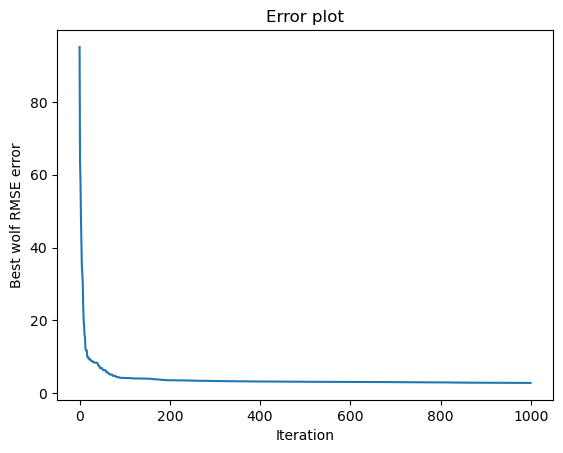

In [26]:
# graph of iteration errors

x_values = range(len(iteration_errors))
plt.plot(x_values, iteration_errors)
plt.xlabel('Iteration')
plt.ylabel('Best wolf RMSE error')
plt.title('Error plot')
plt.show()

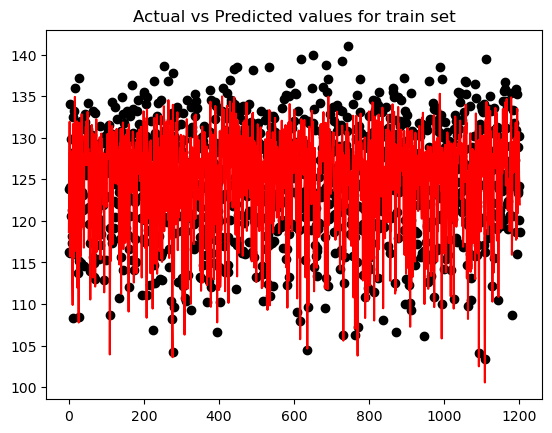

In [27]:
# scatter and line plot for train set

x_values = np.array([i for i in range(X_train.shape[0])])
plt.scatter(x_values, y_train, color = 'black', label = 'Actual values')
plt.plot(x_values, y_train_pred, color = 'red', label = 'Predicted values')
plt.title('Actual vs Predicted values for train set')
plt.show()

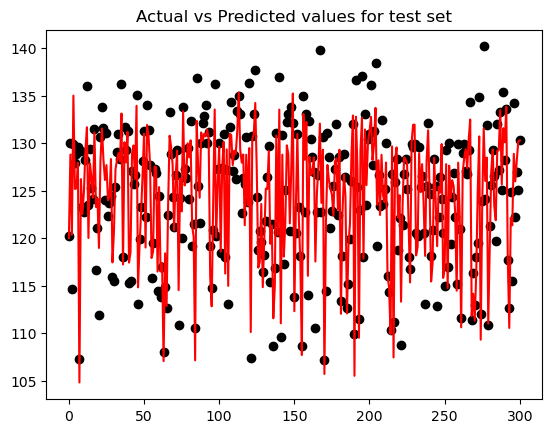

In [28]:
# scatter and line plot for test set

x_values = np.array([i for i in range(X_test.shape[0])])
plt.scatter(x_values, y_test, color = 'black', label = 'Actual values')
plt.plot(x_values, y_test_pred, color = 'red', label = 'Predicted values')
plt.title('Actual vs Predicted values for test set')
plt.show()